### Test 1 - Split Comparison Test

The test is explained in the README.

This script computes the path lengths for the focal bird in all the UMAPs.

Note: Data paths need to be updated.

In [1]:
# Import packages
 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance
from tqdm import tqdm
import itertools
import glob


In [2]:
def calc_distance(points):
    """ Calculate the euclidean distance between two clusters. """

    total_distance = 0

    for ind in np.arange(1,len(points)):
        curr_distance = distance.euclidean(points[ind-1], points[ind])
        total_distance += curr_distance

    
    return total_distance

In [3]:
def calc_shortest_distance(bird_id, centroids):
    if centroids.shape[0]<2:
        print('Bird ', bird_id, ' has <2 clusters:', centroids.shape[0])
        return 0

    # if centroids.shape[0]>6:
    #     print('Bird ', bird_id, ' has >6 clusters:', centroids.shape[0])
    #     return 0
    
    all_permutations = np.array(list(itertools.permutations(centroids)))
    perm_distances = [calc_distance(permutation) for permutation in all_permutations]
    shortest_distance = np.min(perm_distances)
    return shortest_distance
        

In [4]:
def gather_path_info(bird_id, centroid_df):

    bird_centroids = centroid_df.loc[(centroid_df.bird_id==bird_id)  & (centroid_df.cluster_id<300) , ["centroid_x", "centroid_y"]].values

    n_syll = bird_centroids.shape[0]

    
    print("bird_id: ", bird_id)
    print("n_syll: ", n_syll)

    path_length = calc_shortest_distance(bird_id, bird_centroids)

    
    return path_length, n_syll

In [5]:
def identify_non_focal_birds(centroid_df, focal_bird):
    bird_list = np.unique(centroid_df['bird_id'].values)
    bird_list = np.delete(bird_list, focal_bird)
    bird_list =  np.sort(bird_list)
    return bird_list.astype(int)

In [6]:
def gather_bird_path_lengths(centroid_df, n_birds, n_iter):
    bird_ids = np.arange(n_birds)
    # Find distance between all pairs of clusters
    for bird_id in bird_ids:
        dist, n_syll = gather_path_info(bird_id, centroid_df)

        
        # Store the pairwise distance in the distance matrix
        distance_matrix[bird_id, n_iter] = dist
        # distance_matrix[cluster2, cluster1, n_iter] = 0
        distance_dict['bird_id'].append(bird_id)
        distance_dict['iteration'].append(n_iter)
        distance_dict['distance'].append(dist)
        distance_dict['n_syll'].append(n_syll)


In [7]:
def gather_focal_bird_path_length(centroid_df, focal_bird, split_no):
        dist, n_syll = gather_path_info(focal_bird, centroid_df)

        non_focal_birds = identify_non_focal_birds(centroid_df, focal_bird)

        
        # Store the pairwise distance in the distance matrix
        distance_matrix[focal_bird, split_no] = dist
        # distance_matrix[cluster2, cluster1, n_iter] = 0
        distance_dict['focal_bird_id'].append(focal_bird)
        distance_dict['split'].append(split_no)
        distance_dict['distance'].append(dist)
        distance_dict['n_syll'].append(n_syll)
        distance_dict['non_focal_birds'].append(non_focal_birds)


In [8]:

data_folder = "/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Main script/Data/"
results_folder ="/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/SplitComparisonTest/Results/"
embeddings_folder = results_folder + '/Embeddings/'
centroids_folder = results_folder + '/Centroids/'
distances_folder = results_folder + '/Distances/'


In [9]:
normalise = False
n_embeddings = 22
n_syllables = 150 # Tutored

In [10]:


# Set the number of iterations and number of clusters expected (= # of digits) 
# n_iterations = n_embeddings #len(rseeds)
n_birds  = 11 #31 Tutored birds
n_splits = 2

# Initialising a matrix to hold all the pairwise distances in each representation
distance_matrix = np.zeros((n_birds, n_splits))
distance_dict = {
    'focal_bird_id': [],
    'split': [],
    'distance': [],
    'n_syll': [],
    'non_focal_birds': []
}

In [11]:
centroid_files = glob.glob(centroids_folder + 'centroids*.csv')


In [12]:
for centroid_file in centroid_files:

    print(centroid_file)

    focal_bird = centroid_file.split('.')[0].split('_')[-2]
    split_no = centroid_file.split('.')[0].split('_')[-1]
    results_filename_tag = '_' + focal_bird + '_' + split_no
    focal_bird = int(focal_bird)
    split_no = int(split_no)




    centroid_df = pd.read_csv(centroid_file) 

    gather_focal_bird_path_length(centroid_df, focal_bird, split_no)
 


/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/SplitComparisonTest/Results//Centroids/centroids__8_0.csv
bird_id:  8
n_syll:  4
/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/SplitComparisonTest/Results//Centroids/centroids__9_1.csv
bird_id:  9
n_syll:  6
/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/SplitComparisonTest/Results//Centroids/centroids__7_1.csv
bird_id:  7
n_syll:  8
/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/SplitComparisonTest/Results//Centroids/centroids__0_0.csv
bird_id:  0
n_syll:  6
/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/SplitComparisonTest/Results//Centroids/centroids__3_1.csv
bird_id:  3
n_syll:  4
/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/SplitComparisonTest/Results//Centroids/centroids__7_0.csv
bird_id:  7
n_syll:  8
/home/remya/Work/AlamTest/Alam JC/Oct 2024/Alam tests/Aux scripts/SplitComparisonTest/Results//Centroids/centroids__10

In [13]:

# Save the distance matrix in an npy file
np.save(distances_folder +  'path_length_matrix' + '.npy', distance_matrix)

# Store the distance matrix in a csv file
distance_df = pd.DataFrame.from_dict(distance_dict)
distance_df.to_csv(distances_folder + 'path_length_df' + '.csv', index=True)  

In [14]:
distance_df

,focal_bird_id,split,distance,n_syll,non_focal_birds
0,8,0,39.721665,4,"[0, 2, 3, 4, 5, 8, 10, 14, 19, 22, 23, 26, 27,..."
1,9,1,37.701424,6,"[0, 1, 3, 5, 6, 8, 9, 12, 14, 16, 21, 23, 24, ..."
2,7,1,44.581216,8,"[0, 2, 4, 5, 7, 9, 10, 18, 22, 23, 24, 25, 26,..."
3,0,0,40.047959,6,"[1, 5, 6, 9, 10, 12, 13, 14, 16, 17, 18, 24, 2..."
4,3,1,23.778199,4,"[0, 1, 2, 5, 8, 9, 14, 19, 20, 23, 24, 25, 26,..."
5,7,0,27.786992,8,"[0, 1, 3, 6, 7, 8, 11, 13, 14, 15, 16, 19, 20,..."
6,10,0,31.128163,5,"[0, 1, 2, 3, 4, 5, 6, 7, 10, 11, 14, 16, 18, 1..."
7,3,0,31.103116,4,"[0, 3, 4, 7, 10, 11, 12, 13, 15, 16, 17, 18, 2..."
8,4,1,43.126931,4,"[0, 4, 7, 9, 11, 12, 14, 18, 21, 23, 25, 27, 2..."
9,8,1,39.603270,4,"[0, 1, 6, 7, 8, 9, 11, 12, 15, 16, 17, 20, 21,..."


### Analyses

#### Plotting the pairwise distance b/w a given pair across the several iteratiions

In [15]:
n_birds

11

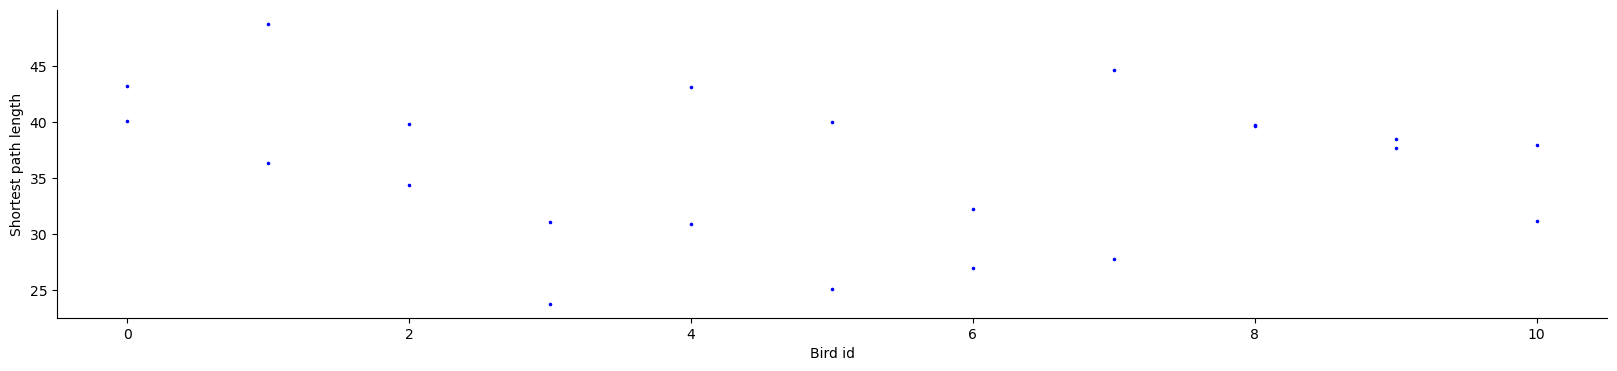

In [16]:
# Plot distances from all iterations for each pair of digit clusters
fig, ax = plt.subplots(1, figsize=(20, 4))
x_ticklabels = []

# Iterating through all pairs of digits
for i in np.arange(n_birds):
            # Make a box plot
            # ax.boxplot(distance_matrix[i],
            #        patch_artist=False,  # fill with color
            #        positions = [k],
            #        boxprops=dict(color='lightgrey'),
            #        whiskerprops=dict(color='lightgrey'),
            #        showfliers = False,
            #        medianprops = dict(color='black')
            #        ) 
            # Indicate each data point
            ax.scatter(np.zeros((n_splits))+i, distance_matrix[i], s=10, color='blue', marker='.')

            # # Add the x-tick labels
            # tl = str(i) 
            # x_ticklabels.append(tl)

            # Increment the position on the x axis
            # k += 1

# Plot formatting
# ax.set_xticklabels(x_ticklabels, rotation=45);
ax.set_ylabel('Shortest path length')
ax.set_xlabel('Bird id')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)



Fig: The x axis indicates the pair of clusters being tested. The blue point shows the euclidean distance b/w the clusters of the test pair, in one UMAP representation. The box plot describes the distribution of pairwise distances for a given test pair.

In [17]:
# Saving the figure
fig.savefig(distances_folder + 'path_lengths_vs_split.png', bbox_inches='tight')